## EECS 545 - Machine Learning
## Lecture 2: Linear Algebra and Optimization
### Date: January 11, 2016
### Instructor: Jacob Abernethy



In [1]:
from IPython.core.display import HTML, Image
from IPython.display import YouTubeVideo
from sympy import init_printing, Matrix, symbols, Rational
import sympy as sym
from warnings import filterwarnings
init_printing(use_latex = 'mathjax')
filterwarnings('ignore')

%pylab inline

import numpy as np

Populating the interactive namespace from numpy and matplotlib


# Additional Comments from last lecture

* **Quizzes** will be given every other week, through Canvas. Quizzes will be **due at 10am on Mondays** when there is no HW due. They will generally be simple and straightforward, and check to make sure that you're following along with the lectures etc.

* **HW1** will be available today at 11pm

* Homework assignments will always be **submitted electronically**. It is best to write solutions in a nice typesetting system (LaTeX) for proofs etc., but we will accept scanned handwritten homework.

## UPDATE: Tutorials to be held, starting THIS WEEK

* The GSIs will be hosting **Tutorial Sessions** over the first 4 weeks of the course
* Mostly will work through example problems and solutions
* Tutorials will be held (roughly) on Wednesdays 5-6pm
* First tutorial **this Wednesday**, location TBD (Check Piazza/Canvas soon)
* Topics to be covered:
    * Linear Algebra + Optimization
    * Probability + Stats
    * **Python**

## Today is something of an experiment
* These slides are alive!

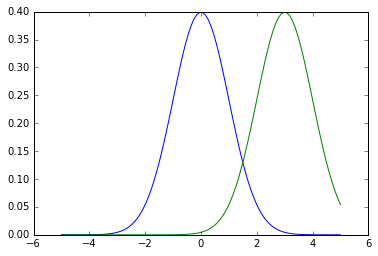

In [31]:
import numpy as np
xs = np.linspace(-5,5,num=100)
ys = (1/np.sqrt(2 * np.pi))* np.exp(-(xs ** 2)/2.0)
plt.plot(xs,ys)
ys = (1/np.sqrt(2 * np.pi))* np.exp(-((xs -3) ** 2)/2.0)
plt.plot(xs,ys)

## We can embed all kinds of things

* Videos, for example:

In [3]:
YouTubeVideo('Stn23Pg9L9M')

## Just one cat picture...

In [4]:
Image(url='http://catbearding.com/wp-content/uploads/2013/06/cat_water_drip.gif')

## This lecture is just a Jupyter Notebook


In [5]:
Image(url='http://jupyter.org/assets/main-logo.svg')

* Formerly known as an *IPython Notebook*
* Cool way to lay out code, output, and other stuff
* Lets you display mathematical content alongside plots, etc.

## TODAY: Fast overview of linear algebra + convexity
For the next hour-ish, we're going to do:
* Vectors and norms
* Matrices
* Positive definite matrices
* Eigendecomposition
* Singular Value Decomposition
* Symmetric matrice

In [6]:
a11, a12, a21, a22, b11, b12, b21, b22 = symbols('a11 a12 a21 a22 b11 b12 b21 b22')

# Basic matrix multiplication

In [7]:
A = Matrix([[a11, a12], [a21, a22]])
B = Matrix([[b11, b12], [b21, b22]])
A, B

⎛⎡a₁₁  a₁₂⎤, ⎡b₁₁  b₁₂⎤⎞
⎜⎢        ⎥  ⎢        ⎥⎟
⎝⎣a₂₁  a₂₂⎦  ⎣b₂₁  b₂₂⎦⎠

In [8]:
A * B

⎡a₁₁⋅b₁₁ + a₁₂⋅b₂₁  a₁₁⋅b₁₂ + a₁₂⋅b₂₂⎤
⎢                                    ⎥
⎣a₂₁⋅b₁₁ + a₂₂⋅b₂₁  a₂₁⋅b₁₂ + a₂₂⋅b₂₂⎦

In [9]:
A = Matrix([[3, 1], [1, 3]])
A

⎡3  1⎤
⎢    ⎥
⎣1  3⎦

## Matrix Transpose
* The transpose $A^T$ of a matrix $A$ is what you get from "swapping" rows and columns
$$A \in \mathbb{R}^{n \times m} \implies A^T \in  \mathbb{R}^{m \times n}$$
$$(A^T)_{i,j} := A_{j,i}$$
* A matrix $A$ is *symmetric* if we have $A^\top = A$

* Some easy ways to get a symmetric matrix:
$$A + A^\top, \quad A A^\top, \quad A^\top A $$

### Transpose properties
* Obvious properties of the transpose:
    * $(A + B)^T = A^T + B^T$
    * $(AB)^T = A^T B^T$ (......right?)

* No! Careful!
    * $(AB)^T = B^T A^T$ 

### Rank of a matrix
* col($A$), the column space of a m-by-n matrix $A$, is the set of all possible linear combinations of its column vectors.
* row($A$), the row space of a m-by-n matrix $A$, is the set of all possible linear combinations of its row vectors.
* rank($A$) (the rank of a m-by-n matrix $A$) is
    * The maximal number of linearly independent columns = The maximal number of linearly independent rows
    * rank($A$) = dimension of col($A$) = dimension of row($A$)

### We can still talk about Rank for non-square matrices
* If $A$ is n by m, then
    * rank($A$) ≤ min(m,n)
    * If rank($A$) = n, then $A$ has full row rank
    * If rank($A$) = m, then $A$ has full column rank

## Vector Norms
* A norm measures the "length" of a vector
* We usually use notation $\|x\|$ to denote the norm of $x$
* A norm is a function $f : \mathbb{R}^n \to \mathbb{R}$ such that:
    * $f(x) \geq 0$ for all $x$
    * $f(x) = 0 \Longleftrightarrow x = 0$
    * $f(tx) = |t| f(x)$ for all $x$
    * $f(x + y) \leq f(x) + f(y)$ for all $x$ and $y$ (Triangle Inequality)

## Examples of norms
* Perhaps the most common norm is the Euclidean norm
$$ \|x\|_2 := \sqrt{x_1^2 + x_2^2 + \ldots x_n^2}$$

* This is a special case of the $p$-norm:
$$ \|x\|_p := \left(|x_1|^p + \ldots + |x_n|^p\right)^{1/p}$$

* There's also the so-called **infinity norm**
$$ \|x\|_\infty := \max_{i=1,\ldots, n} |x_i|$$

* A vector $x$ is said to be *normalized* if $\|x\| = 1$

# Matrix inversion
* The inverse $A^{-1}$ of a *square matrix* $A$ is the unique matrix such that $A A^{-1} = A^{-1}A = I$
* The inverse doesn't always exist! (For example, when $A$ not full-rank)

In [10]:
X = np.array([[3, 1], [1, 3]])
Matrix(X) # putting Matrix() around X is just for pretty printing

⎡3  1⎤
⎢    ⎥
⎣1  3⎦

In [11]:
Xinv = np.linalg.inv(X)
Matrix(Xinv), Matrix(Xinv.dot(X)) # Should give the identity matrix

⎛⎡0.375   -0.125⎤, ⎡1.0  0.0⎤⎞
⎜⎢              ⎥  ⎢        ⎥⎟
⎝⎣-0.125  0.375 ⎦  ⎣0.0  1.0⎦⎠

## Determinant + Trace

* The determinant of a **square** matrix $A$, denoted $|A|$, has the following recursive structure:
$$\begin{vmatrix} a & b & c & d\\e & f & g & h\\i & j & k & l\\m & n & o & p \end{vmatrix}=a\begin{vmatrix} f & g & h\\j & k & l\\n & o & p \end{vmatrix} 
- b\begin{vmatrix} e & g & h\\i & k & l\\m & o & p \end{vmatrix}\\
+c\begin{vmatrix} e & f & h\\i & j & l\\m & n & p \end{vmatrix}
-d\begin{vmatrix} e & f & g\\i & j & k\\m & n & o \end{vmatrix}.
$$
* The trace of a matrix, denoted tr$(A)$, is defined as the sum of the diagonal elements of $A$ 


## Orthogonal + Normalized = Orthonormal
* Two vectors $x,y$ are *orthogonal* if $x^T y = 0$
* A square matrix $U \in \mathbb{R}^{n \times n}$ is *orthogonal* if all columns $U_1, \ldots, U_n$ are orthogonal to each other (i.e. $U_i^\top U_j = 0$ for $i \ne j$)
* $U$ is *orthonormal* if it is orthogonal **and** the columns are normalized, i.e. $\|U_i\|_2 = 1$ for every $i$.

## Positive Definiteness
* We say a symmetric matrix $A$ is positive definite if
$$ x^\top A x > 0 \text{ for all } x \ne 0$$
* We say a matrix is positive semi-definite (PSD) if 
$$ x^\top A x \geq 0 \text{ for all } x$$
* A matrix that is positive definite gives us a *norm*. Let
$$ \| x \|_A := \sqrt{x ^\top A x} $$

## Eigenvalues and Eigenvectors
### What are eigenvectors?
* A Matrix is a mathematical object that acts on a (column) vector, resulting in a new vector, i.e. A**x**=**b**
* An eigenvector is the resulting vector that is parallel to **x** (some multiple of **x**)
$$ {A}\underline{x}=\lambda \underline{x} $$
* The eigenvectors with an eigenvalue of zero are the vectors in the nullspace
* If A is singular (takes some non-zero vector into 0) then &#955;=0

In [12]:
lamda = symbols('lamda') # Note that lambda is a reserved word in python, so we use lamda (without the b)

## How to solve A**x**=&#955;**x**

$$ A\underline { x } =\lambda \underline { x } \\ \left( A-\lambda I \right) \underline { x } =\underline { 0 }  $$

* The only solution to this equation is for A-&#955;I to be singular and therefor have a determinant of zero
$$ \left|{A}-\lambda{I}\right|=0 $$

* This is called the characteristic (or eigenvalue) equation
* There will be *n* &#955;<sup>'s</sup> for a *n*&#215;*n* matrix(some of which may be of equal value) 

## Example eigenvalue problem

In [13]:
A = Matrix([[3, 1], [1, 3]])
I = sym.eye(2)
A, I # Printing A and the 2-by-2 identity matrix to the screen

⎛⎡3  1⎤, ⎡1  0⎤⎞
⎜⎢    ⎥  ⎢    ⎥⎟
⎝⎣1  3⎦  ⎣0  1⎦⎠

In [14]:
(A - lamda * I) # Printing A minus lambda times the identity matrix to the screen

⎡-λ + 3    1   ⎤
⎢              ⎥
⎣  1     -λ + 3⎦

* This will have the following (symbolic) determinant polynomial

In [15]:
(A - lamda * I).det()

 2          
λ  - 6⋅λ + 8

## Eigenvalue example
* We can solve the polynomial $\lambda^2 - 6\lambda + 8$ with python:

In [16]:
((A - lamda * I).det()).factor()

(λ - 4)⋅(λ - 2)

* I now have two eigenvalues of 2 and 4
* I can get the two eigenvectors, $x_1$ and $x_2$, by solving
$$ (A - 2I)x_1 = 0 \text{ and } (A - 4I)x_2 = 0 $$
* I need to find a vector in the *null space* of $A - 2I$ and $A - 4I$.

## Getting eigenvalues/vectors using numpy

In [17]:
X = np.array([[3, 1], [1, 3]])
Matrix(X)

⎡3  1⎤
⎢    ⎥
⎣1  3⎦

In [18]:
eigenvals, eigenvecs = np.linalg.eig(X)
Matrix(eigenvecs)

⎡0.707106781186547  -0.707106781186547⎤
⎢                                     ⎥
⎣0.707106781186547  0.707106781186547 ⎦

In [19]:
Matrix(eigenvals)

⎡4.0⎤
⎢   ⎥
⎣2.0⎦

## Trace related to eigenvals
* Let $A$ be a matrix whose eigenvalues are $\lambda_1, \ldots, \lambda_n$
* Then we have the trace of satisfying
$$\text{tr}(A) = \sum_{i=1}^n \lambda_i$$

In [20]:
X = np.random.randn(5,10)
A = X.dot(X.T) # For fun, let's look at A = X * X^T
eigenvals, eigvecs = np.linalg.eig(A) # Compute eigenvalues of A
sum_of_eigs = sum(eigenvals) # Sum the eigenvalues
trace_of_A = A.trace() # Look at the trace
(sum_of_eigs, trace_of_A) # Are they the same?

(49.0816881269, 49.0816881269)

## Determinant related to eigenvals
* Let $A$ be a matrix whose eigenvalues are $\lambda_1, \ldots, \lambda_n$
* Then we have the trace of satisfying
$$|A| = \prod_{i=1}^n \lambda_i$$

In [21]:
# We'll use the same matrix A as before
prod_of_eigs = np.prod(eigenvals) # Sum the eigenvalues
determinant = np.linalg.det(A) # Look at the trace
(prod_of_eigs, determinant) # Are they the same?

(5258.60186506, 5258.60186506)

# Singular Value Decomposition
* Any matrix (symmetric, non-symmetric, etc.) $A \in \mathbb{R}^{n\times m}$ admits a *singular value decomposition* (SVD)
* The decomposition has three factors, $U \in \mathbb{R}^{n \times n}$, $\Sigma \in \mathbb{R}^{n \times m}$, and $V \in \mathbb{R}^{m \times m}$
$$A = U \Sigma V^\top$$
* $U$ and $V$ are both orthonormal matrices, and $\Sigma$ is diagonal

## SVD Example

In [22]:
A = np.array([[4, 4], [-3, 3]])
Matrix(A)

⎡4   4⎤
⎢     ⎥
⎣-3  3⎦

* Let's show Sigma from the SVD output

In [23]:
U, Sigma_diags, V = np.linalg.svd(A)
Matrix(np.diag(Sigma_diags)) # Numpy's SVD only returns diagonals, here I'm showing full Sigma

⎡5.65685424949238        0.0       ⎤
⎢                                  ⎥
⎣      0.0         4.24264068711928⎦

* And we can show the orthonormal bases $U$ and $V$

In [24]:
U,V = np.round(U,decimals=5), np.round(V,decimals=5)

In [25]:
Matrix(U), Matrix(V) # I rounded the values for clarity

⎛⎡-1.0  0.0⎤, ⎡-0.70711  -0.70711⎤⎞
⎜⎢         ⎥  ⎢                  ⎥⎟
⎝⎣0.0   1.0⎦  ⎣-0.70711  0.70711 ⎦⎠

## Properties of the SVD
 $$\text{SVD:} \quad \quad A = U \Sigma V^\top$$
* The *singular values* of $A$ are the diagonal elements of $\Sigma$
* The singular values of $A$ are the *square roots of the eigenvalues* of both $A^\top A$ and $A A^\top$
* The *left-singular vectors* of $A$, i.e. the columns of $U$, are the *eigenvectors* of $A A^\top$
* The *right-singular vectors* of $A$, i.e. the columns of $V$, are the *eigenvectors* of $A^\top A$

In [26]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/e/e9/Singular_value_decomposition.gif')

* Wikipedia: Visualization of the SVD of a 2d matrix M. First, we see the unit disc in blue together with the two canonical unit vectors. We then see the action of M, which distorts the disk to an ellipse. The SVD decomposes M into three simple transformations: an initial rotation V∗, a scaling Σ along the coordinate axes, and a final rotation U. The lengths σ1 and σ2 are singular values of M.

# Functions and Convexity
* Let $f$ be a function mapping $\mathbb{R}^{n} \to \mathbb{R}$, and assume $f$ is twice differentiable.
* The *gradient* and *hessian* of $f$, denoted $\nabla f(x)$ and $\nabla^2 f(x)$, are the vector an matrix functions:
$$\nabla f(x) = \begin{bmatrix}\frac{\partial f}{\partial x_1} \\ \vdots \\ \frac{\partial f}{\partial x_n}\end{bmatrix} \quad \quad \quad \nabla^2 f(x) = \begin{bmatrix}\frac{\partial^2 f}{\partial x_1^2} & \ldots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\  \vdots & & \vdots \\\frac{\partial^2 f}{\partial x_1 \partial x_n} & \ldots & \frac{\partial^2 f}{\partial x_n^2}\end{bmatrix}$$
* Note: the hessian is always symmetric!

## Gradients of three simple functions
* Let $b$ be some vector, and $A$ be some matrix
* $f(x) = b^\top x \implies \nabla_x f(x) = b$
* $f(x) = x^\top A x \implies \nabla_x f(x) = 2 A x$
* $f(x) = x^\top A x \implies \nabla^2_x f(x) = 2 A $

## Convex functions
* We say that a function $f$ is *convex* if, for any distinct pair of points $x,y$ we have
$$f\left(\frac{x + y}{2}\right) \leq \frac{f(x)}{2} + \frac{f(y)}{2}$$

In [27]:
Image(url='http://www.probabilitycourse.com/images/chapter6/Convex_b.png', width=400)

## Fun facts about convex functions
* If $f$ is differentiable, then $f$ is convex iff $f$ "lies above its linear approximation", i.e.:
$$ f(x + y) \geq f(x) + \nabla_x f(x) \cdot y \quad \text{ for every } x,y$$
* If $f$ is twice-differentiable, then the hessian is always positive semi-definite!
* This last one you will show on your homeowork :-)

## See you all on Wednesday!